In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

In [3]:
np.random.seed(42)

In [4]:
data = {
    'Student_ID': range(1, 21),
    'Math_Score': [75, 88, 92, np.nan, 60, 45, 80, 100, 85, 90, 78, 50, 35, 20, 65, 95, 88, np.nan, 77, 200],
    'Science_Score': [70, 85, 89, 75, 60, 50, 79, 99, 83, 91, 74, 52, 40, 30, 62, 94, 86, 89, 76, 88],
    'Attendance_Percentage': [90, 95, 88, 92, 60, 55, 87, 100, 98, 93, np.nan, 58, 65, 45, 77, 96, 94, 89, 80, 70],
    'Assignment_Grade': ['A', 'A', 'B', 'B', 'C', 'D', 'B', 'A', 'B', 'A', 'B', 'C', 'F', 'F', 'C', 'A', 'B', 'B', 'B', 'Z']  # Z is an invalid grade
}

In [5]:
dataframe=pd.DataFrame(data)

In [8]:
dataframe.isnull().sum()

Student_ID               0
Math_Score               2
Science_Score            0
Attendance_Percentage    1
Assignment_Grade         0
dtype: int64

In [21]:
dataframe.head()

,Student_ID,Math_Score,Science_Score,Attendance_Percentage,Assignment_Grade,Math_Score_transformed
0,1,75.000000,70.0,90.0,A,-0.077823
1,2,88.000000,85.0,95.0,A,0.518840
2,3,92.000000,89.0,88.0,B,0.707907
3,4,79.055556,75.0,92.0,B,0.105286
4,5,60.000000,60.0,60.0,C,-0.729051


In [22]:
dataframe.columns

Index(['Student_ID', 'Math_Score', 'Science_Score', 'Attendance_Percentage',
       'Assignment_Grade', 'Math_Score_transformed'],
      dtype='object')

In [23]:
#filling missing values
dataframe['Math_Score'].fillna(dataframe['Math_Score'].mean(),inplace=True)
dataframe['Attendance_Percentage'].fillna(dataframe['Attendance_Percentage'].mean(),inplace=True)


dataframe['Math_Score'] = dataframe['Math_Score'].fillna(dataframe['Math_Score'].mean())
dataframe['Attendance_Percentage'] = dataframe['Attendance_Percentage'].fillna(dataframe['Attendance_Percentage'].mean())


In [10]:
dataframe.isnull().sum()

Student_ID               0
Math_Score               0
Science_Score            0
Attendance_Percentage    0
Assignment_Grade         0
dtype: int64

In [11]:
#fixing inconsistent values
valid_grades=['A','B','C','D','F']
dataframe['Assignment_Grade']=dataframe['Assignment_Grade'].apply(lambda x : x if x in valid_grades else dataframe['Assignment_Grade'].mode()[0])

In [12]:
dataframe['Assignment_Grade'].unique()

array(['A', 'B', 'C', 'D', 'F'], dtype=object)

In [13]:
#detect outliers using zscore
numeric_cols = ['Math_Score', 'Science_Score', 'Attendance_Percentage']
z_score=np.abs(zscore(dataframe[numeric_cols]))
outliers=(z_score>3)

In [14]:
print(outliers)

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [ True False False]]


In [15]:
for col in numeric_cols:
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound,
              np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col]))

In [16]:
#skewness
print(dataframe['Math_Score'].skew())

-0.35518553612254267


In [17]:
transformer=PowerTransformer(method='yeo-johnson')
dataframe['Math_Score_transformed']=transformer.fit_transform(dataframe[['Math_Score']]) #syntax imp

In [18]:
print(dataframe['Math_Score_transformed'].skew())

-0.04525620885574577


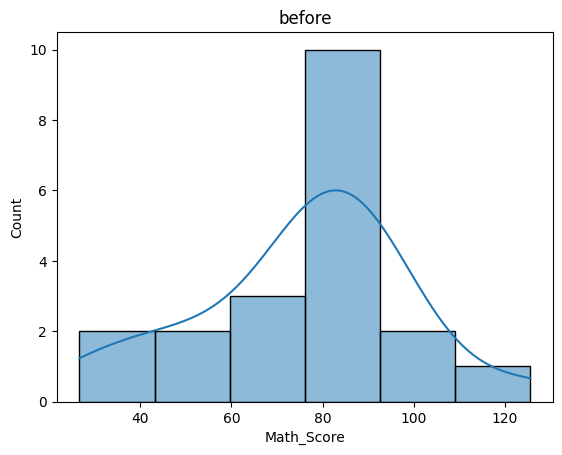

In [19]:
plt.title('before')
sns.histplot(x='Math_Score',kde=True,data=dataframe)
plt.show()

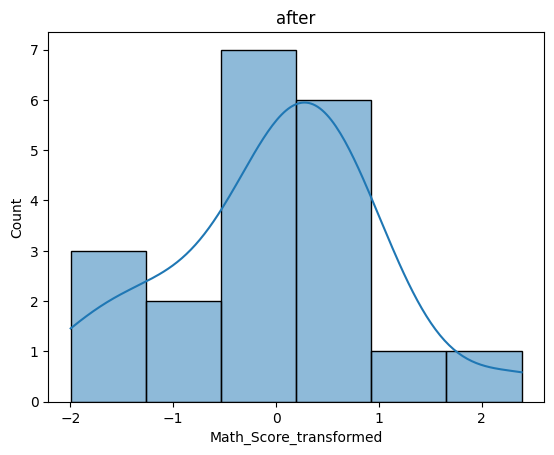

In [20]:
plt.title('after')
sns.histplot(x='Math_Score_transformed',kde=True,data=dataframe)
plt.show()